In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
def sum_(x):
    sum_ = []
    for i in range(len(x)):
        sum_.append(sum(x[0:i]))
    return sum_

In [116]:
df_ = pd.read_csv("C:\\Users\\Utilisateur\\Desktop\\Football_prediction\\Win_Loose_Goals_Rate_and_Odds_Season_Season1920_.csv")

In [184]:
""" Creation du label Gain_net_class
Ce label vaut 1 si le gain_net est positif et -1 si le gain_net et null ou négatif"""
gain_net_class = []
for i in range(len(df_)):
    if df_["Gain_net"].iloc[i]>0:
        gain_net_class.append(1)
    else:
        gain_net_class.append(-1)
df_["Gain_net_class"] = gain_net_class
#sns.countplot(df_["Gain_net_class"])

In [192]:
from sklearn.model_selection import train_test_split
Test = "Global" 
Test = "Season"
odd_max = +1.5
odd_min = -1.5
N_games = 28 # Il n'y a que 8 matchs de joués actuellement
N_split = N_games

if Test == "Global":

    X = df_.loc[(df_.Log_B365 < odd_max) & (df_.Log_B365 > odd_min)].drop(["Gain_net_class"],axis=1)
    Y = df_.loc[(df_.Log_B365 < odd_max) & (df_.Log_B365 > odd_min)].Gain_net_class
    X.fillna(value=0, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)#, random_state=0)
elif Test == "Season":
    X_train = df_.iloc[:-N_split,:].loc[(df_.iloc[:-N_split,:].Log_B365 < odd_max) & (df_.iloc[:-N_split,:].Log_B365 > odd_min)].drop(["Gain_net_class"],axis=1)
    X_test = df_.iloc[-N_split:,:].loc[(df_.iloc[-N_split:,:].Log_B365 < odd_max) & (df_.iloc[-N_split:,:].Log_B365 > odd_min)].drop(["Gain_net_class"],axis=1)
    y_train = df_.iloc[:-N_split,:].loc[(df_.iloc[:-N_split,:].Log_B365 < odd_max) & (df_.iloc[:-N_split,:].Log_B365 > odd_min)].Gain_net_class
    y_test = df_.iloc[-N_split:,:].loc[(df_.iloc[-N_split:,:].Log_B365 < odd_max) & (df_.iloc[-N_split:,:].Log_B365 > odd_min)].Gain_net_class
    X_train.fillna(value=0, inplace=True)
    X_test.fillna(value=0, inplace=True)


ratio_odd = len(df_.loc[(df_.Log_B365 < odd_max) & (df_.Log_B365 > odd_min)])/len(df_)
print("Pourcentage de matchs sélectionnés par rapport à leur odds = ", ratio_odd)

list_drop = ["Gain_net", 'HomeTeam', 'AwayTeam', "Journee","Season", "FTR"]

Pourcentage de matchs sélectionnés par rapport à leur odds =  0.7446183953033269


In [193]:
X_test

,HomeTeam,AwayTeam,B365H,B365D,B365A,Log_B365,Journee,Season,Gain_net,HomeWinRate,AwayWinRate,HomeLooseRate,AwayLooseRate,HomeScoredGoalsRate,AwayScoredGoalsRate,HomeConcededGoalsRate,AwayConcededGoalsRate,FTR
4060,Chelsea,Tottenham,1.72,4.00,4.50,-0.961753,27,2019,0.72,0.666667,0.450980,0.132353,0.308824,2.166667,1.602941,0.867647,1.318627,H
4061,Burnley,Bournemouth,2.10,3.30,3.70,-0.566395,27,2019,1.10,0.385321,0.233333,0.403670,0.566667,1.137615,1.088889,1.266055,1.900000,H
4062,Crystal Palace,Newcastle,1.95,3.40,4.20,-0.767255,27,2019,0.95,0.335938,0.228916,0.468750,0.548193,1.101562,0.945783,1.257812,1.753012,H
4063,Sheffield United,Brighton,1.95,3.40,4.20,-0.767255,27,2019,-1.00,0.428571,0.134615,0.357143,0.615385,1.142857,0.788462,0.928571,1.653846,D
4064,Southampton,Aston Villa,1.61,4.33,5.00,-1.133204,27,2019,0.61,0.374150,0.224490,0.333333,0.517007,1.455782,0.986395,1.285714,1.802721,H
4065,Leicester,Man City,4.50,4.20,1.70,0.973449,27,2019,-1.00,0.477064,0.544118,0.275229,0.235294,1.550459,1.882353,1.119266,1.044118,A
4066,Man United,Watford,1.60,3.90,6.00,-1.321756,27,2019,0.60,0.686275,0.233333,0.132353,0.577778,2.053922,0.988889,0.808824,1.777778,H
4068,Arsenal,Everton,2.00,3.60,3.70,-0.615186,27,2019,1.00,0.661765,0.250000,0.132353,0.401961,2.132353,1.151961,0.872549,1.411765,H
4070,Norwich,Leicester,4.33,4.10,1.72,0.923243,28,2019,3.33,0.344444,0.330275,0.355556,0.449541,1.277778,1.412844,1.377778,1.541284,H
4071,Brighton,Crystal Palace,2.05,3.25,3.90,-0.643137,28,2019,-1.00,0.326923,0.312500,0.307692,0.445312,1.153846,1.164062,1.307692,1.500000,A


In [194]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=5000, C=0.1, solver='lbfgs', penalty='l2')
logit.fit(X_train.drop(list_drop,axis=1), y_train)
print("Train_score:", logit.score(X_train.drop(list_drop,axis=1), y_train), "Test_score:", logit.score(X_test.drop(list_drop,axis=1), y_test))

Train_score: 0.6573982125124131 Test_score: 0.6086956521739131


In [200]:
y_hat = logit.predict(X_test.drop(list_drop,axis=1))
y_hat_proba = logit.predict_proba(X_test.drop(list_drop,axis=1))
def betting_advice(y_hat, y_hat_proba, X_test, mise_max,):
    index_to_bet = []
    coeff_mise = []
    mise_max = mise_max #€
    
    for i in range(len(y_hat)):
        if y_hat[i] == 1:
            index_to_bet.append(i)
            coeff_mise.append(y_hat_proba[i][1])
    money_bet = np.asarray(coeff_mise)* mise_max
    feat_list = ['HomeTeam', 'AwayTeam', 'B365H', 'B365D', 'B365A', 'Journee']
    Betting_advice = X_test.iloc[index_to_bet,:][feat_list]
    Betting_advice["ConfidenceIndex"] = coeff_mise
    Betting_advice["MoneyBetEuro"] = money_bet
    return Betting_advice

print("Ratio de matchs à parier: ", len(betting_advice(y_hat,y_hat_proba,X_test,5))/len(X_test))
betting_advice(y_hat,y_hat_proba,X_test,5)

Ratio de matchs à parier:  0.43478260869565216


,HomeTeam,AwayTeam,B365H,B365D,B365A,Journee,ConfidenceIndex,MoneyBetEuro
4060,Chelsea,Tottenham,1.72,4.00,4.50,27,0.514485,2.572425
4063,Sheffield United,Brighton,1.95,3.40,4.20,27,0.507726,2.538629
4064,Southampton,Aston Villa,1.61,4.33,5.00,27,0.504258,2.521288
4066,Man United,Watford,1.60,3.90,6.00,27,0.722595,3.612977
4068,Arsenal,Everton,2.00,3.60,3.70,27,0.565886,2.829428
4077,Tottenham,Wolves,2.45,3.20,3.00,28,0.557141,2.785704
4079,Arsenal,West Ham,1.57,4.40,5.50,28,0.690724,3.453620
4081,Sheffield United,Norwich,1.65,3.75,5.75,29,0.611151,3.055757
4082,Southampton,Newcastle,1.61,4.10,5.25,29,0.509815,2.549073
4085,Chelsea,Everton,1.80,3.90,4.20,29,0.594838,2.974189


In [201]:
"""Calcul du gain_net avec algo"""
n = 5
m = 1
gain_net_algo = []
invest_algo = []
gain_brut_algo = []
for i in range(len(y_test)):
    if y_hat[i] == 1:
        
        invest_algo.append(m*n*y_hat_proba[i][1])
        
        if y_test.iloc[i] == 1:
            gain_net_algo.append(X_test["B365H"].iloc[i]*(m*n*y_hat_proba[i][1])-(m*n*y_hat_proba[i][1]))
            gain_brut_algo.append(X_test["B365H"].iloc[i]*(m*n*y_hat_proba[i][1]))
        else:
            gain_net_algo.append(-m*n*y_hat_proba[i][1])
            gain_brut_algo.append(0)
            
    elif y_hat[i] == -1:
        invest_algo.append(0)
        gain_net_algo.append(0)
        gain_brut_algo.append(0)

gain_net_no_algo = []
gain_brut_no_algo = []
invest_no_algo =[]

for i in range(len(y_test)):
    invest_no_algo.append(m)
    if y_test.iloc[i] == 1:
        gain_net_no_algo.append(X_test["B365H"].iloc[i]*m -m)
        gain_brut_no_algo.append(X_test["B365H"].iloc[i]*m)
    else:
        gain_net_no_algo.append(-m)
        gain_brut_no_algo.append(0)
    
print("Investissement total (avec algo) = ", sum_(invest_algo)[-1])
print("Gain_brut total (avec algo) = ", sum_(gain_brut_algo)[-1])
print("Gain_net total (avec algo) = ", (sum_(gain_brut_algo)[-1]-sum_(invest_algo)[-1]))
print("Rendement total (avec algo) = ", (sum_(gain_brut_algo)[-1]-sum_(invest_algo)[-1])/sum_(invest_algo)[-1])
print("===================================================")
print("Investissement total (sans algo) = ", sum_(invest_no_algo)[-1])
print("Gain_brut total (sans algo) = ", sum_(gain_brut_no_algo)[-1])
print("Gain_net total (sans algo) = ", (sum_(gain_brut_no_algo)[-1]-sum_(invest_no_algo)[-1]))
print("Rendement total (sans algo) = ", (sum_(gain_brut_no_algo)[-1]-sum_(invest_no_algo)[-1])/sum_(invest_no_algo)[-1])

Investissement total (avec algo) =  28.893089496289107
Gain_brut total (avec algo) =  35.74118717662114
Gain_net total (avec algo) =  6.848097680332032
Rendement total (avec algo) =  0.23701507176003345
Investissement total (sans algo) =  22
Gain_brut total (sans algo) =  25.53
Gain_net total (sans algo) =  3.530000000000001
Rendement total (sans algo) =  0.16045454545454552


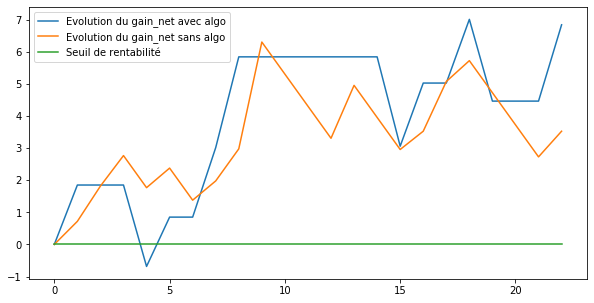

In [202]:
plt.figure(figsize=(10,5))
plt.plot(sum_(gain_net_algo), label= "Evolution du gain_net avec algo")
plt.plot(sum_(gain_net_no_algo), label= "Evolution du gain_net sans algo")
plt.plot(np.zeros(len(sum_(gain_net_algo))), label="Seuil de rentabilité")
plt.legend()

In [203]:
N_gain_positif = 0 # Nombre de paris rapportant de l'argent
N_gain_negatif = 0 # Nombre de paris faisant perdre de l'argent
for i in range(len(gain_net_algo)):
    if gain_net_algo[i]>0:
        N_gain_positif+=1
    elif gain_net_algo[i]<0:
        N_gain_negatif+=1
N_paris = N_gain_negatif + N_gain_positif # Nombre de paris joués
print("Taux de gains perdants =", N_gain_negatif/N_paris , "Taux de gains gagnants =", N_gain_positif/N_paris)

Taux de gains perdants = 0.3 Taux de gains gagnants = 0.7
